In [1]:
import imutils
# from skimage import exposure
import numpy as np
# import argparse
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance

def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    print(corner)
    cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 3)
    cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 3)
    cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 3)
 
textColor = (0,0,180) 
textSixe = 0.7
def putOriginCoord(img, table_3d_coord, table_2d_coord):
    cv2.putText(img,'1. {0[0]:0.0f}; {0[1]:0.0f}'.format(table_3d_coord[0]), tuple(np.array(table_2d_coord[0]-[0,25],dtype=np.integer)), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)
    cv2.putText(img,'2. {0[0]:0.0f}; {0[1]:0.0f}'.format(table_3d_coord[1]), tuple(np.array(table_2d_coord[1]-[0,25],dtype=np.integer)), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)
    cv2.putText(img,'3. {0[0]:0.0f}; {0[1]:0.0f}'.format(table_3d_coord[2]), tuple(np.array(table_2d_coord[2]-[0,25],dtype=np.integer)), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)
    cv2.putText(img,'4. {0[0]:0.0f}; {0[1]:0.0f}'.format(table_3d_coord[3]), tuple(np.array(table_2d_coord[3]-[0,25],dtype=np.integer)), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)

def putImgCoord(img, table_2d_coord):
    cv2.putText(img,'{0[0]}; {0[1]}'.format(table_2d_coord[0]), tuple(table_2d_coord[0]), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)
    cv2.putText(img,'{0[0]}; {0[1]}'.format(table_2d_coord[1]), tuple(table_2d_coord[1]), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)
    cv2.putText(img,'{0[0]}; {0[1]}'.format(table_2d_coord[2]), tuple(table_2d_coord[2]), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)
    cv2.putText(img,'{0[0]}; {0[1]}'.format(table_2d_coord[3]), tuple(table_2d_coord[3]), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)

def putImgCoord1(img, coord):
    cv2.putText(img,'{0[0]}; {0[1]}'.format(coord), tuple(coord), cv2.FONT_HERSHEY_SIMPLEX, textSixe, textColor, 2)

# cv2.line(img, (0,table_2d_coord[0][1]), tuple(table_2d_coord[0]), (0, 0, 255), 1)
# cv2.line(img, (table_2d_coord[0][0],0), tuple(table_2d_coord[0]), (0, 0, 255), 1)
# cv2.line(img, (0,table_2d_coord[1][1]), tuple(table_2d_coord[1]), (0, 255, 0), 1)
# cv2.line(img, (table_2d_coord[1][0],0), tuple(table_2d_coord[1]), (0, 255, 0), 1)
# cv2.line(img, (0,table_2d_coord[2][1]), tuple(table_2d_coord[2]), (255, 0, 0), 1)
# cv2.line(img, (table_2d_coord[2][0],0), tuple(table_2d_coord[2]), (255, 0, 0), 1)
# cv2.line(img, (0,table_2d_coord[3][1]), tuple(table_2d_coord[3]), (0, 255, 255), 1)
# cv2.line(img, (table_2d_coord[3][0],0), tuple(table_2d_coord[3]), (0, 255, 255), 1)

# cv2.circle(img, tuple(table_2d_coord[0]), 5, (0, 0, 255), -1)
# cv2.circle(img, tuple(table_2d_coord[1]), 5, (0, 255, 0), -1)
# cv2.circle(img, tuple(table_2d_coord[2]), 5, (255, 0, 0), -1)
# cv2.circle(img, tuple(table_2d_coord[3]), 5, (0, 255, 255), -1)

# blank_image = np.zeros((y_cm+1,x_cm+1,3), np.uint8)
# cv2.circle(blank_image, tuple(table_3d_coord[0][:2]), 5, (0, 0, 255), -1)
# cv2.circle(blank_image, tuple(table_3d_coord[1][:2]), 5, (0, 255, 0), -1)
# cv2.circle(blank_image, tuple(table_3d_coord[2][:2]), 5, (255, 0, 0), -1)
# cv2.circle(blank_image, tuple(table_3d_coord[3][:2]), 5, (0, 255, 255), -1)
# plt.figure(figsize=(10,10))
# plt.imshow(blank_image)

def calibrate(name):
    cw = 9
    ch = 6
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((ch*cw,3), np.float32)
    objp[:,:2] = np.mgrid[0:cw,0:ch].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    
    cimg = cv2.imread('img/'+name)
    cimg = imutils.resize(cimg, height = 768)
    gray = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (cw,ch),None)
    objpoints.append(objp)
    imgpoints.append(corners)
    _, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    return mtx, dist


def order_points(pts):
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]

    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]

    # now, sort the left-most coordinates according to their
    # y-coordinates so we can grab the top-left and bottom-left
    # points, respectively
    leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
    (tl, bl) = leftMost

    # now that we have the top-left coordinate, use it as an
    # anchor to calculate the Euclidean distance between the
    # top-left and right-most points; by the Pythagorean
    # theorem, the point with the largest distance will be
    # our bottom-right point
    D = distance.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
    (br, tr) = rightMost[np.argsort(D)[::-1], :]

    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
    return np.array([tl, tr, br, bl], dtype="float32")

def intersections(edged):
    h, w = edged.shape

    n = 0
    i = 0;
    while n!=4: 
        hl = cv2.HoughLines(edged,2,np.pi/180,190+(i*5))
        n = hl.shape[0]
        i+=1
        
    hl = hl.reshape(4,2)
    print(hl)

    
#     for rho,theta in hl:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))
#         cv2.line(img, (x1,y1), (x2,y2), (0, 0, 255), 2)
#     plt.figure(figsize=(10,10))
#     plt.imshow(img)        
    

    T = np.zeros((n,2),dtype=np.float32)
    R = np.zeros((n),dtype=np.float32)

    T[:,0] = np.cos(hl[:,1])
    T[:,1] = np.sin(hl[:,1])
    R = hl[:,0]
    XY = []
    for i in range(n):
        for j in range(i+1, n):
            x,y = np.linalg.inv(T[[i,j],:]).dot(R[[i,j]])
            if x > 0 and x <= w and y > 0 and y <= h:
                XY.append([x,y])

    return order_points(np.array(XY, dtype=np.integer))

def draw1(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # draw top layer in red color
    cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    
def proccessImg(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_green = np.array([80, 80, 50])
    upper_green = np.array([90, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_blur = cv2.medianBlur(mask,15)
#     res = cv2.bitwise_and(img,img, mask=mask_blur)

    edged = cv2.Canny(mask_blur, 10, 200)
    
    return mask, mask_blur, edged

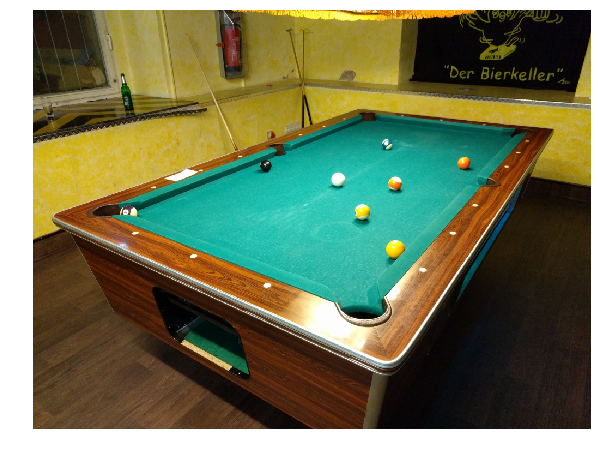

In [2]:
orig = cv2.imread('img/random.jpg')
orig = imutils.resize(orig, height = 768)
orig = cv2.cvtColor(orig, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(orig)

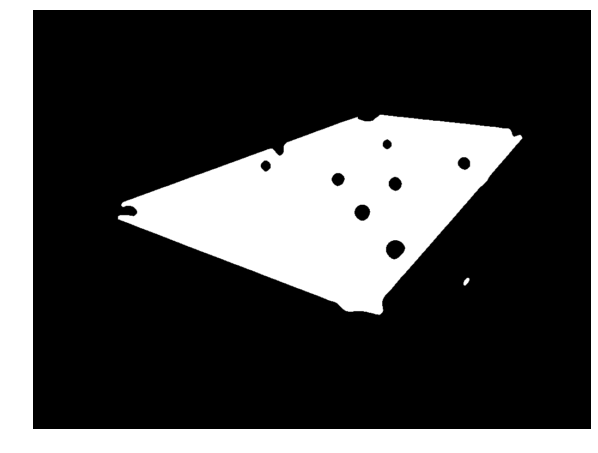

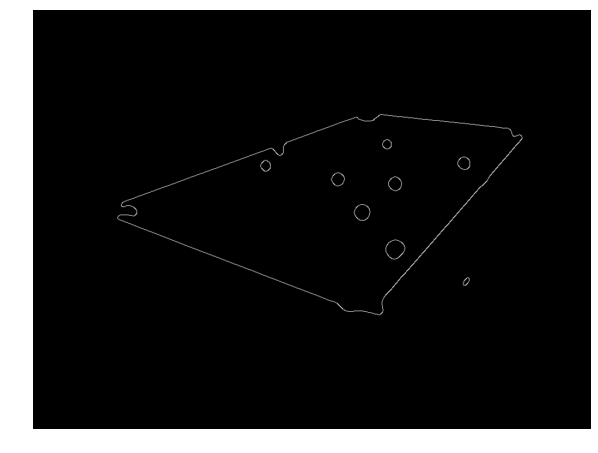

In [3]:
img = orig.copy()

h, w = img.shape[:2]

mask, mask_blur, edged = proccessImg(img)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(mask_blur, cmap='gray', interpolation='bilinear')

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(edged, cmap='gray', interpolation='bilinear');

[[3.0100000e+02 1.9373155e+00]
 [8.3100000e+02 7.1558499e-01]
 [3.8500000e+02 1.2217305e+00]
 [1.2300000e+02 1.6755161e+00]]


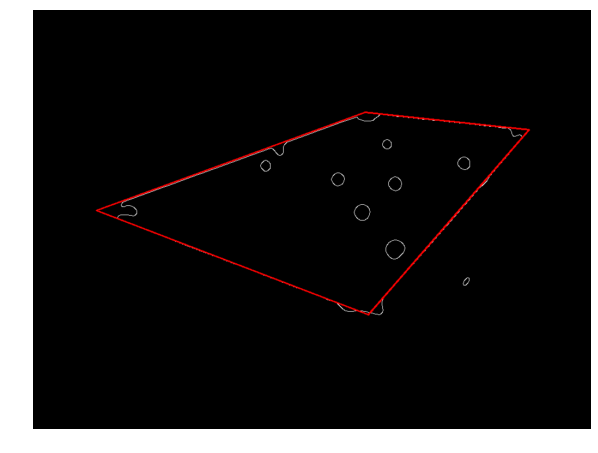

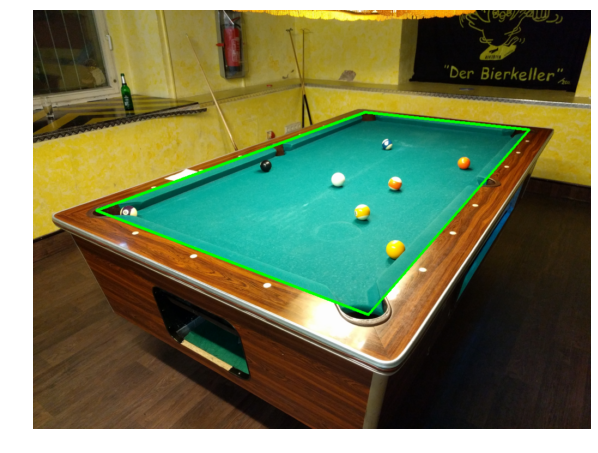

In [17]:
img = orig.copy()

col = cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB)



corners = np.array(intersections(edged), dtype=np.int)

img_lines = cv2.polylines(img,[corners],True,(0,255,0), 3)
msk_lines = cv2.polylines(col,[corners],True,(255,0,0), 2)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(msk_lines, cmap='gray', interpolation='bilinear');

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_lines, cmap='gray', interpolation='bilinear');

[[3.0100000e+02 1.9373155e+00]
 [8.3100000e+02 7.1558499e-01]
 [3.8500000e+02 1.2217305e+00]
 [1.2300000e+02 1.6755161e+00]]
(298.45483, 319.0201)


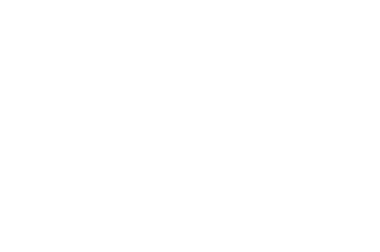

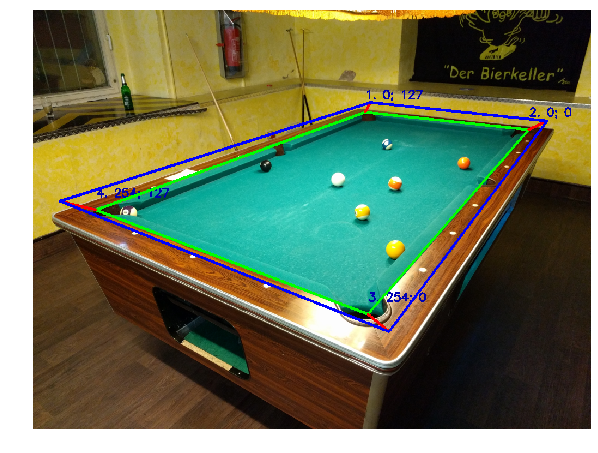

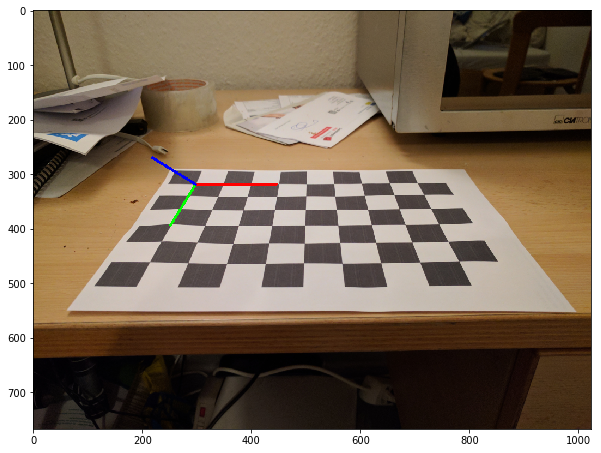

In [18]:
img = orig.copy()
x_cm = 254
y_cm = 127
#ball_cm = 5.715
#mesh_cm = 25.4
# x_cm = 10
# y_cm = 5

corners = np.array(intersections(edged), dtype=np.int)
cv2.polylines(img,[corners],True,(255,0,0), 1)

# todo: sort according to corners
table_3d_coord = np.array([[0, y_cm, 0],[0, 0, 0], [x_cm, 0, 0], [x_cm, y_cm, 0] ], dtype=np.float32)
table_2d_coord = np.array(corners.reshape(4,1,2),dtype=np.float32)

putOriginCoord(img, table_3d_coord, table_2d_coord.reshape(4,2))

# putImgCoord(img, table_2d_coord)
# putImgCoord(mask_blur, table_2d_coord)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
objpoints.append(table_3d_coord)
imgpoints.append(table_2d_coord)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w, h), None, None)

# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# corners2 = cv2.cornerSubPix(mask_blur,table_2d_coord.reshape(-1, 2),(11,11),(-1,-1),criteria)

# mtx, dist = calibrate('c1.jpg')

_, rvec, tvec, inliers = cv2.solvePnPRansac(table_3d_coord, table_2d_coord, mtx, dist)


z = 20
axis = np.float32([[0,0,0], [0,y_cm,0], [x_cm,y_cm,0], [x_cm,0,0], [0,0,-z],[0,y_cm,-z],[x_cm,y_cm,-z],[x_cm,0,-z] ])
# axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0], [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])
imgpts, jac = cv2.projectPoints(axis, rvec, tvec, mtx, dist)


draw1(img, imgpoints[0], imgpts)

plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(img)


cimg = cv2.imread('img/c1.jpg')
cimg = imutils.resize(cimg, height = 768)
gray = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
cimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)


# Find the chess board corners
ret, ccorners = cv2.findChessboardCorners(gray, (9,6),None)

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
_, rvec, tvec, inliers = cv2.solvePnPRansac(objp, ccorners, mtx, dist)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

imgpts, jac = cv2.projectPoints(axis, rvec, tvec, mtx, dist)

draw(cimg,ccorners,imgpts)

plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(cimg)

# plt.figure(figsize=(10,10))
# plt.imshow(res)



# fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))
# ax[0,0].imshow(res)
# plt.figure()
# ax[0,1].imshow(mask)
# plt.figure()
# ax[1,1].imshow(edged)



# plt.imshow(mask)